In [ ]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [ ]:
df_urldata = pd.read_csv("../Data/Datasets/urldata.csv")
df_urldata = df_urldata[["url", "label"]]

print("urldata.csv shape:", df_urldata.shape)
print(df_urldata["label"].value_counts())

# 2.2 malicious_phish.csv
df_phish = pd.read_csv("../Data/Datasets/malicious_phish.csv")
df_phish.rename(columns={"type": "label"}, inplace=True)
df_phish = df_phish[["url", "label"]]

print("malicious_phish.csv shape:", df_phish.shape)
print(df_phish["label"].value_counts())


urldata.csv shape: (450176, 2)
label
benign       345738
malicious    104438
Name: count, dtype: int64
malicious_phish.csv shape: (651191, 2)
label
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64


In [ ]:

API_KEY = "YOUR_OPENPHISH_API_KEY"  


# a = "https://openphish.com/feed.txt"
try:
    response_public = requests.get(a, timeout=10)
    public_urls = response_public.text.splitlines()
    df_open_public = pd.DataFrame({"url": public_urls})
    df_open_public["label"] = 1
    print("OpenPhish public feed URLs:", len(df_open_public))
except Exception as e:
    print("Error fetching public feed:", e)
    df_open_public = pd.DataFrame(columns=["url", "label"])


api_urls = []
try:
    api_url = f"https://openphish.com/api/v1/phishing?api_key={API_KEY}"
    response_api = requests.get(api_url, timeout=10)
    if response_api.status_code == 200:
        data = response_api.json()
        api_urls = [item["url"] for item in data.get("phishing", [])]
        df_open_api = pd.DataFrame({"url": api_urls})
        df_open_api["label"] = 1
        print("OpenPhish API feed URLs:", len(df_open_api))
    else:
        print("API status code:", response_api.status_code)
        df_open_api = pd.DataFrame(columns=["url", "label"])
except Exception as e:
    print("Error fetching API feed:", e)
    df_open_api = pd.DataFrame(columns=["url", "label"])


OpenPhish public feed URLs: 300
API status code: 403


In [ ]:

mapping_urldata = {
    "benign": 0,
    "safe": 0,
    "clean": 0,
    "good": 0,
    "malicious": 1,
    "phishing": 1,
    "spam": 1,
    "suspicious": 1,
    "highrisk": 1
}
df_urldata["label"] = df_urldata["label"].str.lower().map(mapping_urldata)
df_urldata.dropna(subset=["label"], inplace=True)
df_urldata["label"] = df_urldata["label"].astype(int)


mapping_phish = {
    "benign": 0,
    "phishing": 1,
    "malware": 1,
    "defacement": 1,
    "spam": 1
}
df_phish["label"] = df_phish["label"].str.lower().map(mapping_phish)
df_phish.dropna(subset=["label"], inplace=True)
df_phish["label"] = df_phish["label"].astype(int)


In [ ]:


df = pd.concat([df_urldata, df_phish, df_open_public, df_open_api], ignore_index=True)
print("Merged dataset shape:", df.shape)
print(df["label"].value_counts())

Merged dataset shape: (1101667, 2)
label
0    773841
1    327826
Name: count, dtype: int64


In [ ]:

df.dropna(subset=["url"], inplace=True)
df["url"] = df["url"].astype(str).str.strip()
df = df[df["url"] != ""]


df = df[df["url"].str.len() < 2048]


df.drop_duplicates(subset="url", inplace=True)

df.reset_index(drop=True, inplace=True)
print("After cleaning:", df.shape)
print(df["label"].value_counts())


After cleaning: (1090518, 2)
label
0    773816
1    316702
Name: count, dtype: int64


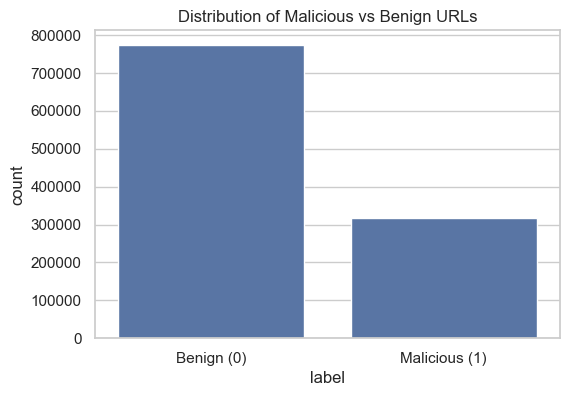

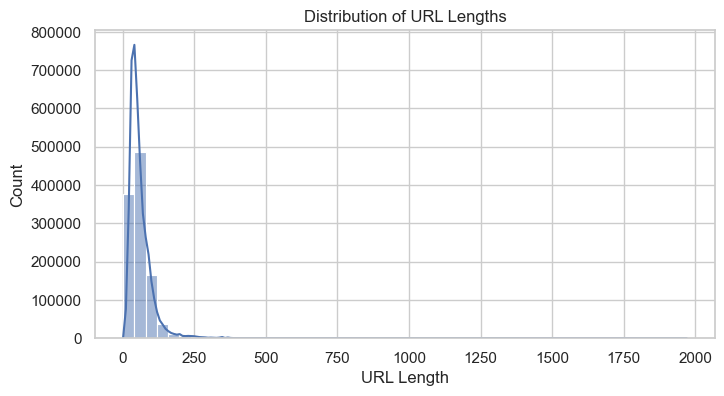

In [ ]:

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df)
plt.title("Distribution of Malicious vs Benign URLs")
plt.xticks([0,1], ["Benign (0)", "Malicious (1)"])
plt.show()


df["url_length"] = df["url"].str.len()
plt.figure(figsize=(8,4))
sns.histplot(df["url_length"], bins=50, kde=True)
plt.title("Distribution of URL Lengths")
plt.xlabel("URL Length")
plt.show()


In [19]:
df.head()

,url,label,url_length
0,https://www.google.com,0,22
1,https://www.youtube.com,0,23
2,https://www.facebook.com,0,24
3,https://www.baidu.com,0,21
4,https://www.wikipedia.org,0,25


In [ ]:

df.to_csv("../Data/cleaned_urls.csv", index=False)
print("Saved cleaned dataset → cleaned_urls.csv")


Saved cleaned dataset → cleaned_urls.csv
